In [43]:
import pandas as pd 
import numpy as np
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

path = "sales_train_evaluation.csv"
df = pd.read_csv(path)
path2 = 'sell_prices.csv'
df_sell = pd.read_csv(path2)
path3 = "calendar.csv"
calendar = pd.read_csv("calendar.csv")

In [ ]:
"""
Infos sur le df, dataset "sales_train_evaluation"


df.columns:
Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1932', 'd_1933', 'd_1934', 'd_1935', 'd_1936', 'd_1937', 'd_1938',
       'd_1939', 'd_1940', 'd_1941'],
      dtype='object', length=1947)
      
df.cat_id.unique()
array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

df.dept_id.unique()
array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)


"""

In [27]:
def crop_dataset(data): 
    df_ = df[df["store_id"]=="WI_3"]
    return df_[df_["dept_id"]=="FOODS_3"]

def transpose_days(df):
    categorials = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
    df_ = pd.melt(df,
              id_vars = categorials,
              value_vars = [col for col in df.columns if col.startswith("d_")],
              var_name = "day",
              value_name = "sales")
    return df_

def find_max(df_): 
    sums = []
    items = list(set(df_["item_id"]))
    for id_ in items:
        data = df_[df_["item_id"]==id_]
        s = data.sales.sum()
        sums.append(s)
    print("len=", len(sums), "max:",max(sums))
    print("argmax=", items[np.argmax(sums)])

In [28]:
df_ = crop_dataset(df)
df_ = transpose_days(df_)
find_max(df_)

len= 823 max: 123500
argmax= FOODS_3_090


<AxesSubplot:>

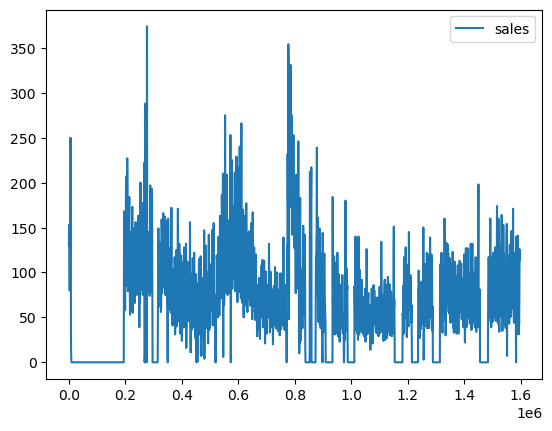

In [29]:
df_ = df_[df_["item_id"]=="FOODS_3_090"]
df_.plot()

In [30]:
df_.describe()

,sales
count,1941.000000
mean,63.626996
std,54.876882
min,0.000000
25%,0.000000
50%,59.000000
75%,94.000000
max,374.000000


In [31]:
df_

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales
88,FOODS_3_090_WI_3_evaluation,FOODS_3_090,FOODS_3,FOODS,WI_3,WI,d_1,130
911,FOODS_3_090_WI_3_evaluation,FOODS_3_090,FOODS_3,FOODS,WI_3,WI,d_2,153
1734,FOODS_3_090_WI_3_evaluation,FOODS_3_090,FOODS_3,FOODS,WI_3,WI,d_3,119
2557,FOODS_3_090_WI_3_evaluation,FOODS_3_090,FOODS_3,FOODS,WI_3,WI,d_4,80
3380,FOODS_3_090_WI_3_evaluation,FOODS_3_090,FOODS_3,FOODS,WI_3,WI,d_5,80
...,...,...,...,...,...,...,...,...
1593416,FOODS_3_090_WI_3_evaluation,FOODS_3_090,FOODS_3,FOODS,WI_3,WI,d_1937,61
1594239,FOODS_3_090_WI_3_evaluation,FOODS_3_090,FOODS_3,FOODS,WI_3,WI,d_1938,42
1595062,FOODS_3_090_WI_3_evaluation,FOODS_3_090,FOODS_3,FOODS,WI_3,WI,d_1939,67
1595885,FOODS_3_090_WI_3_evaluation,FOODS_3_090,FOODS_3,FOODS,WI_3,WI,d_1940,126


<AxesSubplot:>

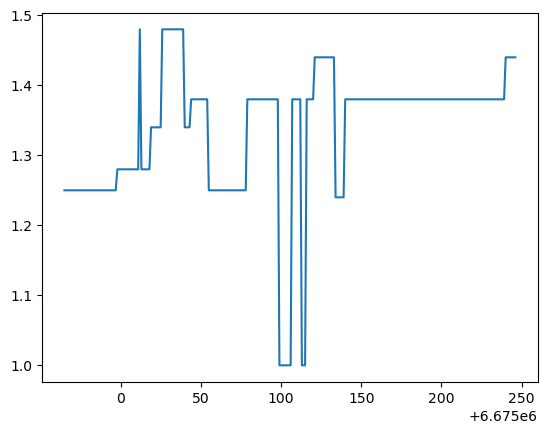

In [35]:
df_sell = df_sell[df_sell["store_id"]=="WI_3"]
df_sell = df_sell[df_sell["item_id"]=="FOODS_3_090"]

prices = df_sell["sell_price"]
prices.plot()

In [36]:
prix = []
for price in prices: 
    for i in range(7): 
        prix.append(price)
prix  = prix[:1941]

In [42]:
df_["prix"] = prix
df_ = df_[["sales", "prix"]]
df_ = df_.reset_index(drop=True)

In [44]:
calendar = calendar.iloc[:1941]
calendar = calendar.reset_index(drop=True)

In [48]:
df = pd.concat([df_, calendar], axis = 1)
df = df.drop(["snap_CA", "snap_TX", "d", "wm_yr_wk"], axis=1)

In [49]:
df.head()

,sales,prix,date,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_WI
0,130,1.25,2011-01-29,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0
1,153,1.25,2011-01-30,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0
2,119,1.25,2011-01-31,Monday,3,1,2011,NaN,NaN,NaN,NaN,0
3,80,1.25,2011-02-01,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,0
4,80,1.25,2011-02-02,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1


In [55]:
df.to_csv("dataset_food90.csv", index=False)

In [56]:
test = pd.read_csv("dataset_food90.csv")
test.head()

,sales,prix,date,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_WI
0,130,1.25,2011-01-29,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0
1,153,1.25,2011-01-30,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0
2,119,1.25,2011-01-31,Monday,3,1,2011,NaN,NaN,NaN,NaN,0
3,80,1.25,2011-02-01,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,0
4,80,1.25,2011-02-02,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1
